In [1]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score


In [2]:
# Step 1: Load the dataset
df = pd.read_json(r"C:\Users\ASUS\OneDrive\Documents\LLM\News_Category_Dataset_v3.json", lines=True)

In [ ]:
# As our dataset contains more number of categories for our model we only take three categories from the dataset.

In [3]:
# Step 2: Select a few categories for simplicity
selected_categories = ['POLITICS', 'TECH', 'SPORTS']
df = df[df['category'].isin(selected_categories)]

In [12]:
df

,link,headline,category,short_description,authors,date,text,text_len
13,https://www.huffpost.com/entry/twitch-streamer...,Twitch Bans Gambling Sites After Streamer Scam...,TECH,One man's claims that he scammed people on the...,Ben Blanchet,2022-09-21,Twitch Bans Gambling Sites After Streamer Scam...,30
17,https://www.huffpost.com/entry/dodgers-basebal...,"Maury Wills, Base-Stealing Shortstop For Dodge...",SPORTS,"Maury Wills, who helped the Los Angeles Dodger...","Beth Harris, AP",2022-09-20,"Maury Wills, Base-Stealing Shortstop For Dodge...",28
21,https://www.huffpost.com/entry/biden-us-forces...,Biden Says U.S. Forces Would Defend Taiwan If ...,POLITICS,President issues vow as tensions with China rise.,,2022-09-19,Biden Says U.S. Forces Would Defend Taiwan If ...,18
24,https://www.huffpost.com/entry/ukraine-festiva...,‘Beautiful And Sad At The Same Time’: Ukrainia...,POLITICS,An annual celebration took on a different feel...,Jonathan Nicholson,2022-09-19,‘Beautiful And Sad At The Same Time’: Ukrainia...,32
26,https://www.huffpost.com/entry/2022-wnba-final...,"Las Vegas Aces Win First WNBA Title, Chelsea G...",SPORTS,Las Vegas never had a professional sports cham...,"Pat Eaton-Robb, AP",2022-09-19,"Las Vegas Aces Win First WNBA Title, Chelsea G...",22
...,...,...,...,...,...,...,...,...
209522,https://www.huffingtonpost.com/entry/rim-ceo-t...,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,TECH,Verizon Wireless and AT&T are already promotin...,"Reuters, Reuters",2012-01-28,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,26
209523,https://www.huffingtonpost.com/entry/maria-sha...,Maria Sharapova Stunned By Victoria Azarenka I...,SPORTS,"Afterward, Azarenka, more effusive with the pr...",,2012-01-28,Maria Sharapova Stunned By Victoria Azarenka I...,30
209524,https://www.huffingtonpost.com/entry/super-bow...,"Giants Over Patriots, Jets Over Colts Among M...",SPORTS,"Leading up to Super Bowl XLVI, the most talked...",,2012-01-28,"Giants Over Patriots, Jets Over Colts Among M...",40
209525,https://www.huffingtonpost.com/entry/aldon-smi...,Aldon Smith Arrested: 49ers Linebacker Busted ...,SPORTS,CORRECTION: An earlier version of this story i...,,2012-01-28,Aldon Smith Arrested: 49ers Linebacker Busted ...,28


In [ ]:
# From the above code we can see the text column has more data which will create more load to the NLP model for doing the tokenization. 
# To avoid the weightage we will create a new column text that will be the concatenation of headline and short description column. 


In [4]:
# Step 3: Combine headline and short description
df['text'] = df['headline'] + " " + df['short_description']

Category Counts:
 category
POLITICS    35602
SPORTS       5077
TECH         2104
Name: count, dtype: int64


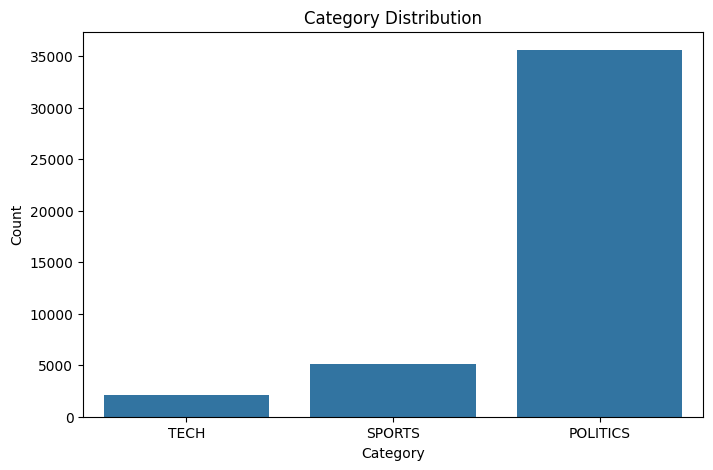

In [5]:
# Step 4: Exploratory Data Analysis
print("Category Counts:\n", df['category'].value_counts())
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='category')
plt.title("Category Distribution")
plt.ylabel("Count")
plt.xlabel("Category")
plt.show()

In [ ]:
# From the above bar chart we can see that the politics has more number of news.

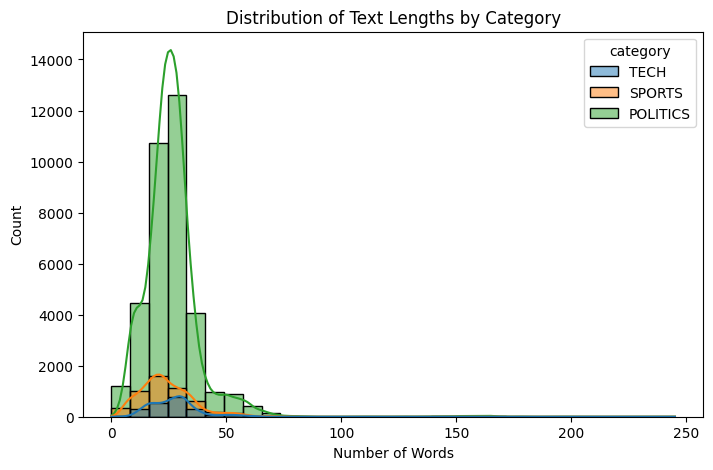

In [6]:
# Plot headline lengths
df['text_len'] = df['text'].apply(lambda x: len(x.split()))
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='text_len', hue='category', bins=30, kde=True)
plt.title("Distribution of Text Lengths by Category")
plt.xlabel("Number of Words")
plt.show()

In [ ]:
# From the above plot we can see that every words in the headlines are normally distributed and politics holds the more number of words.

In [7]:
# Step 5: Prepare features and labels
X = df['text']
y = df['category']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

In [8]:
# Step 6: Define models to test
models = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(max_iter=200),
    'Linear SVM': LinearSVC()
}

In [9]:
# Step 7: Train and evaluate models
results = {}
for name, model in models.items():
    print(f"\n--- {name} ---")
    pipeline = make_pipeline(TfidfVectorizer(stop_words='english'), model)
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred, target_names=selected_categories))



--- Naive Bayes ---
Accuracy: 0.8817
              precision    recall  f1-score   support

    POLITICS       0.88      1.00      0.93     10681
        TECH       0.99      0.39      0.56      1523
      SPORTS       0.98      0.07      0.13       631

    accuracy                           0.88     12835
   macro avg       0.95      0.49      0.54     12835
weighted avg       0.89      0.88      0.85     12835


--- Logistic Regression ---
Accuracy: 0.9422
              precision    recall  f1-score   support

    POLITICS       0.94      0.99      0.97     10681
        TECH       0.94      0.76      0.84      1523
      SPORTS       0.94      0.51      0.66       631

    accuracy                           0.94     12835
   macro avg       0.94      0.76      0.82     12835
weighted avg       0.94      0.94      0.94     12835


--- Linear SVM ---


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Accuracy: 0.9568
              precision    recall  f1-score   support

    POLITICS       0.96      0.99      0.98     10681
        TECH       0.94      0.86      0.90      1523
      SPORTS       0.88      0.67      0.76       631

    accuracy                           0.96     12835
   macro avg       0.93      0.84      0.88     12835
weighted avg       0.96      0.96      0.96     12835



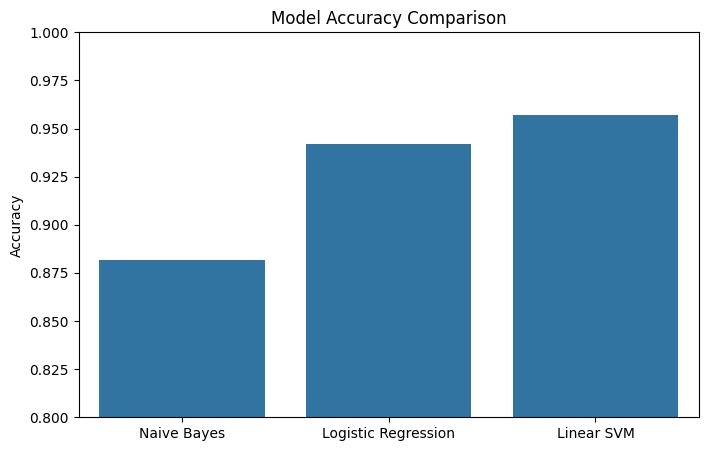

In [10]:
# Step 8: Show model comparison
plt.figure(figsize=(8, 5))
model_names = list(results.keys())
accuracies = list(results.values())
sns.barplot(x=model_names, y=accuracies)
plt.ylim(0.8, 1.0)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
# We have used 3 models (Navie Bayes, Logistic Regression, Linear SVM) to test the accuracy of our data. 
# From the above classification report and the graph we can see that Linear SVM model has the best accuracy and we will consider this as the best model.

In [11]:
# Step 9: Choose the best model
best_model_name = max(results, key=results.get)
print(f"\nBest Model: {best_model_name} with Accuracy: {results[best_model_name]:.4f}")


Best Model: Linear SVM with Accuracy: 0.9568
